In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Acceptance rates

In [58]:
def acc_rates(a_list,start=1,size=10,lamb=0.0):
    for a in a_list:
        epsilons = np.arange(0,2.2,0.2)
        acc_rates = []
        stderrs = []
        for epsilon in epsilons:
            df = pd.read_csv(f"./Datos/Oscillator/acc_rates/start_{start}_eps_{epsilon:0.2f}_size_{size}_a_{a:0.2f}_lambda_{lamb:0.2f}.csv")


            acc_rates += [df["acc_rate"].mean()]
            stderrs += [np.sqrt(df["acc_rate"].var()/len(df))]

        plt.errorbar(epsilons,acc_rates,stderrs,marker="o",ls="-",ecolor="k",label=f"a={a:0.2f}")
    plt.xlabel("Epsion")
    plt.ylabel("Acc rates")
    plt.title(f"Acceptance rates\n lambda={lamb:0.2f}\n  size={size}, start={start}, samples = 1000")
    plt.grid()
    plt.legend()
    plt.show()

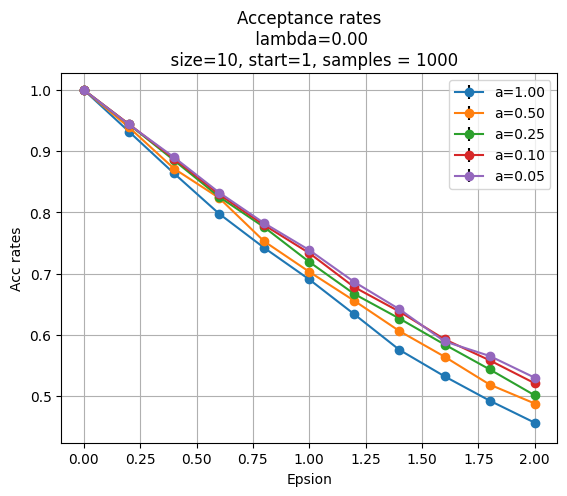

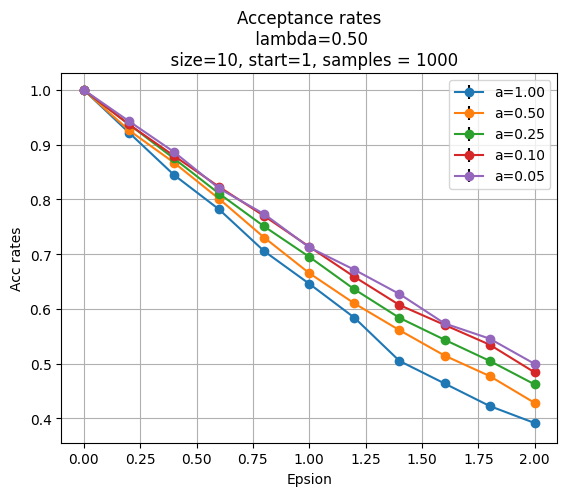

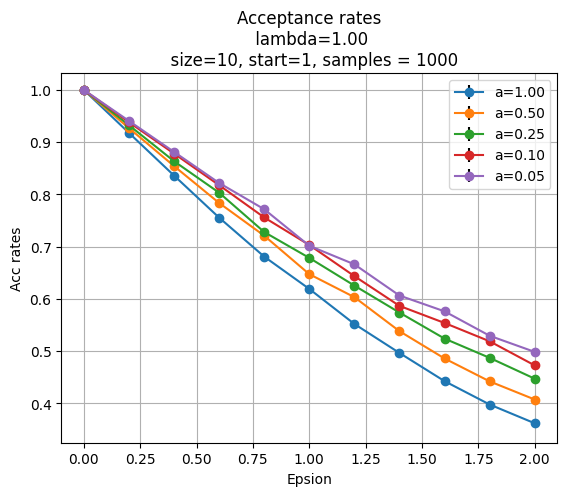

In [61]:
a_list = [1.0,0.5,0.25,0.1,0.05]
acc_rates(a_list,lamb=0.0)
acc_rates(a_list,lamb=0.5)
acc_rates(a_list,lamb=1.0)

### Action vs sweeps


In [6]:
def hot_cold(rho,size,a):
    #df0 = pd.read_csv(f"./Datos/Harmonic/start_0_epsilon_{rho:0.2f}_{size}_{a:0.2f}.csv")
    df1 = pd.read_csv(f"./Datos/Harmonic/start_1_epsilon_{rho:0.2f}_{size}_{a:0.2f}.csv")

    termalization = 1000
    steps = 10

    #x0 = df0["sweep"].iloc[termalization::steps]
    #y0 = df0["S_E"].iloc[termalization::steps]
    x1 = df1["sweep"].iloc[termalization::steps]
    y1 = df1["S_E"].iloc[termalization::steps]

    plt.figure(figsize=(20,5))
    #plt.plot(x0,y0,marker="o",alpha=0.5,color="blue",label=f"Cold start: mean = {y0.mean():0.2f}$\pm${np.sqrt(y0.var()/len(y0)):0.2f}")
    plt.plot(x1,y1,marker="s",alpha=0.5,color="red",label=f"Hot start: mean = {y1.mean():0.2f}$\pm${np.sqrt(y1.var()/len(y1)):0.2f}")

    #plt.axhline(y0.mean(),color = "k", label = "cold mean")
    plt.axhline(y1.mean(),color = "grey", label = "hot mean")

    #plt.title(f"$S_E$ vs sweeps\n sweeps:{len(df0)}\n termalization: {termalization}, steps: {steps}\n a={a:0.2f}")
    plt.xlabel("sweeps")
    plt.xlim(4000,5000)
    plt.ylabel("$S_E$")
    plt.legend()
    plt.show()
    

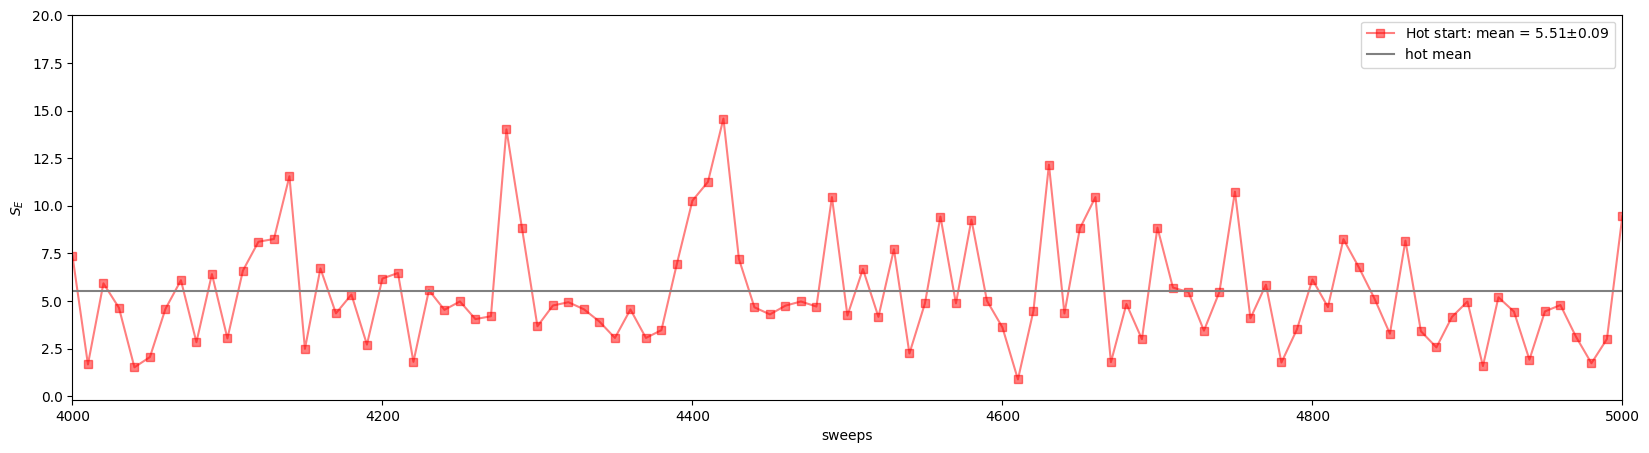

In [7]:
SIZE = 10
epsilon = 0.7
a = 0.05
hot_cold(epsilon,SIZE,a)

In [16]:
def ground_state_hot(rho,size,a_list,start=1):
    e_0=[]
    ind=0
    for a in a_list:
        x = pd.read_csv(f"./Datos/Harmonic/configs/start_1_epsilon_{rho:0.2f}_{size}_{a:0.2f}.csv")

        e_0 += [np.mean(x[str(ind)]**2)]
    
    plt.errorbar(a_list,e_0,marker="o")
    plt.xlabel("a")
    plt.ylabel("$E_0$")
    plt.show()

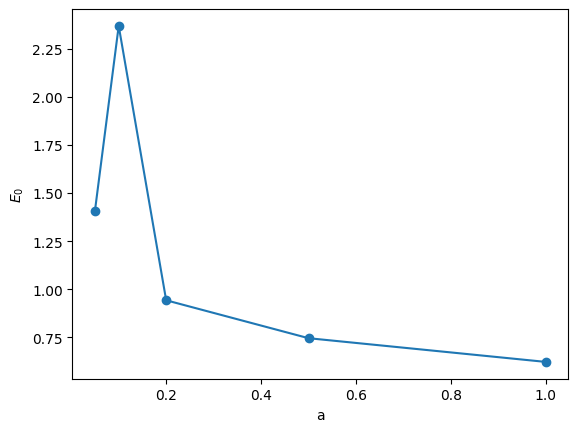

In [17]:
a_list = [1.0,0.5,0.2,0.1,0.05]
ground_state_hot(0.7,10,a_list)

In [14]:
rho=0.7
size=10
a=0.05
x = pd.read_csv(f"./Datos/Harmonic/configs/start_1_epsilon_{rho:0.2f}_{size}_{a:0.2f}.csv")
e_0=0.5*np.mean(x.iloc[:,1]**2)
err=np.sqrt(np.var(x.iloc[:,1])/len(x.iloc[:,1]))
print(f"{e_0} +- {err}")

0.6920207332722158 +- 0.03543462979600577


In [15]:
x

,0,1,2,3,4,5,6,7,8,9
0,-0.330566,-0.487443,-0.510384,-0.424528,-0.561439,-0.669109,-0.782125,-0.187536,-0.172489,-0.330566
1,-0.429055,-0.617113,-0.693761,-0.865188,-0.703236,-0.505947,-0.502861,-0.218097,-0.246645,-0.429055
2,0.148876,-0.226403,-0.161962,-0.294897,-0.194207,-0.095669,-0.451012,-0.368425,0.064687,0.148876
3,-0.210980,-0.296335,-0.492415,-0.505412,-0.177955,-0.189862,0.050567,-0.244067,-0.492791,-0.210980
4,-0.149263,0.299287,0.057642,-0.194782,-0.350213,-0.146851,0.246652,0.130676,-0.053596,-0.149263
...,...,...,...,...,...,...,...,...,...,...
994,0.003319,-0.103666,0.076865,0.423501,0.166815,-0.104840,-0.235393,-0.447472,-0.211036,0.003319
995,0.260665,0.456288,0.319634,0.138052,0.275920,0.249489,-0.039426,-0.146296,0.358612,0.260665
996,-0.036675,0.017591,0.083150,0.083326,-0.026070,0.259549,0.079972,0.356147,0.148241,-0.036675
997,0.023298,0.175787,0.002060,-0.105884,-0.328389,-0.016919,0.212758,0.055074,0.277631,0.023298
